In [15]:
import os
import sys
sys.path.append('./src')
import pickle
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *
from torchvision import transforms

# Define Your Session

In [25]:
session_path = 'results/caa4ec90f27134dae9767ea99cca4f82' # Define your session path

# Prediction Visualization

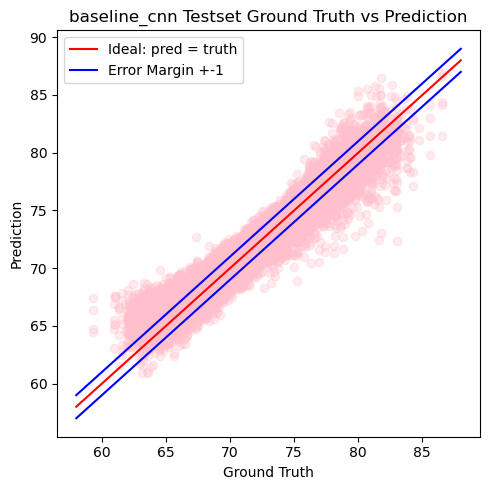

In [26]:
pred_vis(session_path, '', False)

In [ ]:
def worst_pred(session_path, data_path, idxes, mode, data_dir):
    pred_path = os.path.join(session_path, 'pred.json')

    pred_info = json2dict(pred_path)
    gt = np.array(pred_info['true_labels']).reshape(1, -1)
    pred = np.array(pred_info['predictions']).reshape(1, -1)

    if mode == 'abs':
        diff_abs = np.abs(gt - pred)
    # Prediction higher than ground truth
    elif mode == 'h':
        diff_h = pred - gt
    # Prediction lower than ground truth
    elif mode == 'l':
        diff_l = gt - pred
    else:
        print('Warning: Mode argument is not recognized.')
        return
    
    # Load data
    print('...loading dataset')
    dataset = create_dataset_from_preprocessed(data_path, None)
    print('...dataset loading completed')

    # Sanity check loaded data matches ground truth, its regression, so 3 digits match should be good.
    dataset_labels = dataset.labels.round(3)  # Round dataset labels to 3 decimal places
    assert np.allclose(gt, dataset_labels, rtol=1e-3)

    # Find sample indexes with largest error according to modes
    if mode == 'abs':
        target_idxes = np.argsort(diff_abs[0])[::-1][:idxes]  # Get indexes of largest absolute differences
    elif mode == 'h':
        target_idxes = np.argsort(diff_h[0])[::-1][:idxes]  # Get indexes of largest positive differences
    elif mode == 'l':
        target_idxes = np.argsort(diff_l[0])[::-1][:idxes]  # Get indexes of largest negative differences

    # Plot results as subplots with the title shows gt and pred
    _, axs = plt.subplots(len(target_idxes), 1, figsize=(8, 4*len(target_idxes)))
    for i, idx in enumerate(target_idxes):
        sample = dataset[idx]  # Get the sample at the target index
        axs[i].imshow(sample['image'])  # Plot the image
        axs[i].set_title(f"GT: {gt[0, idx]:.3f}, Pred: {pred[0, idx]:.3f}")  # Set the title with gt and pred values
        axs[i].axis('off')  # Turn off axis
    plt.tight_layout()
    plt.show()



worst_pred(session_path, 0, 'abs')

In [4]:
pred_path = os.path.join(session_path, 'pred.json')
pred_info = json2dict(pred_path)
gt = np.array(pred_info['true_labels']).reshape(1, -1)
pred = np.array(pred_info['predictions']).reshape(1, -1)

In [16]:
# Load data
test_transform = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Resize((224, 224))
    ])

data_dir = 'E:/depth_None_True/testset.pkl'
print('...loading dataset')
dataset = create_dataset_from_preprocessed(data_dir, test_transform)
print('...dataset loading completed')

...loading dataset
...dataset loading completed
